- 제 3사분면에 1사분면 점 추가

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.special

In [2]:
def softmax(a):
    
    C = numpy.max(a)
    minus = a-C
    exp_a = numpy.exp(minus)
    sum_exp_a=numpy.sum(exp_a)
    y=exp_a/sum_exp_a

    return y

In [3]:
class neuralNetwork :
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        self.lr=learningrate
        
        self.wih=numpy.array(numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes)))
        self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes)))
        
        self.activation_function=lambda x:scipy.special.expit(x)
        self.activation_function2=lambda b:softmax(b)
        
        pass
    
    
    def train(self,inputs_list,targets_list,mode):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function2(final_inputs)
        
        
        output_errors=targets-final_outputs
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
 
        
        if mode=='w':
            return self.wih,self.who
        elif mode == 'o':
            #return hidden_outputs,final_outputs
            return final_outputs
        elif mode =='e':
            return output_errors,hidden_errors
    
    
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function2(final_inputs)
        
        return final_outputs
    
    

In [4]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 2
hidden_nodes = 15
output_nodes = 4
 
# 학습률
learning_rate = 0.2
 
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# train csv 파일을 리스트로 불러오기
training_data_file = open("train1.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


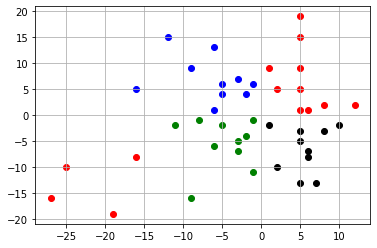

In [5]:

for record in training_data_list: 
    all_values = record.split(',')
    
    if(int(all_values[0])==1):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='r')
    elif(int(all_values[0])==2):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='b')
    elif(int(all_values[0])==3):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='g')
    elif(int(all_values[0])==4):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='k')
    pass

pass

plt.grid()


In [6]:
# 신경망 학습시키기
 
epochs = 300
 
for e in range(epochs):
    accuracy=[]
    print(e+1,'번째')
    for record in training_data_list:        
        all_values = record.split(',') # 레코드를 쉼표에 의해 분리
        
        # 입력 값의 범위와 값 조정
        inputs = numpy.asfarray(all_values[1:3])/50 +0.01
        
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(n.onodes)+0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])-1] = 0.99
        
        if ((int(all_values[0])-1)==numpy.argmax(n.train(inputs, targets,'o'))):
            accuracy.append(1)
        pass
        
        #print(targets)
        #print(n.train(inputs, targets,'o'))        
    pass  
  

    accuracy_array=numpy.asarray(accuracy)
    print('학습률 : ',accuracy_array.sum()/len(training_data_list)*100,'%')
    
pass


1 번째
학습률 :  31.818181818181817 %
2 번째
학습률 :  31.818181818181817 %
3 번째
학습률 :  31.818181818181817 %
4 번째
학습률 :  31.818181818181817 %
5 번째
학습률 :  31.818181818181817 %
6 번째
학습률 :  27.27272727272727 %
7 번째
학습률 :  27.27272727272727 %
8 번째
학습률 :  27.27272727272727 %
9 번째
학습률 :  31.818181818181817 %
10 번째
학습률 :  34.090909090909086 %
11 번째
학습률 :  34.090909090909086 %
12 번째
학습률 :  34.090909090909086 %
13 번째
학습률 :  36.36363636363637 %
14 번째
학습률 :  34.090909090909086 %
15 번째
학습률 :  34.090909090909086 %
16 번째
학습률 :  36.36363636363637 %
17 번째
학습률 :  36.36363636363637 %
18 번째
학습률 :  36.36363636363637 %
19 번째
학습률 :  36.36363636363637 %
20 번째
학습률 :  38.63636363636363 %
21 번째
학습률 :  38.63636363636363 %
22 번째
학습률 :  38.63636363636363 %
23 번째
학습률 :  38.63636363636363 %
24 번째
학습률 :  40.909090909090914 %
25 번째
학습률 :  43.18181818181818 %
26 번째
학습률 :  43.18181818181818 %
27 번째
학습률 :  43.18181818181818 %
28 번째
학습률 :  43.18181818181818 %
29 번째
학습률 :  43.18181818181818 %
30 번째
학습률 :  43.18181818181818 %
31 번째
학

학습률 :  84.0909090909091 %
256 번째
학습률 :  84.0909090909091 %
257 번째
학습률 :  84.0909090909091 %
258 번째
학습률 :  84.0909090909091 %
259 번째
학습률 :  84.0909090909091 %
260 번째
학습률 :  84.0909090909091 %
261 번째
학습률 :  86.36363636363636 %
262 번째
학습률 :  86.36363636363636 %
263 번째
학습률 :  86.36363636363636 %
264 번째
학습률 :  86.36363636363636 %
265 번째
학습률 :  86.36363636363636 %
266 번째
학습률 :  86.36363636363636 %
267 번째
학습률 :  86.36363636363636 %
268 번째
학습률 :  86.36363636363636 %
269 번째
학습률 :  86.36363636363636 %
270 번째
학습률 :  86.36363636363636 %
271 번째
학습률 :  86.36363636363636 %
272 번째
학습률 :  86.36363636363636 %
273 번째
학습률 :  86.36363636363636 %
274 번째
학습률 :  86.36363636363636 %
275 번째
학습률 :  86.36363636363636 %
276 번째
학습률 :  86.36363636363636 %
277 번째
학습률 :  86.36363636363636 %
278 번째
학습률 :  86.36363636363636 %
279 번째
학습률 :  88.63636363636364 %
280 번째
학습률 :  88.63636363636364 %
281 번째
학습률 :  88.63636363636364 %
282 번째
학습률 :  88.63636363636364 %
283 번째
학습률 :  88.63636363636364 %
284 번째
학습률 :  88.6363636363

In [7]:
# test

test_data_file = open("test1.csv", 'r', encoding='UTF8')
test_data_list = test_data_file.readlines()
test_data_file.close()

Acc=[]

for record in test_data_list:        
        all_values = record.split(',') # 레코드를 쉼표에 의해 분리
        
        answer=int(float(all_values[0]))
        
        # 입력 값의 범위와 값 조정
        inputs = numpy.asfarray(all_values[1:3])/40 +0.01
        
        outputs=n.query(inputs)
        
        label=numpy.argmax(outputs)
        
        if((label+1)==answer):
            Acc.append(1)
        else:
            Acc.append(0)
            pass
        pass

Acc_array=numpy.asarray(Acc)
print("performance = ", Acc_array.sum()/Acc_array.size*100,'%')


performance =  91.66666666666666 %
